In [ ]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1.Data Loading and visualize

Text(0, 0.5, 'x2')

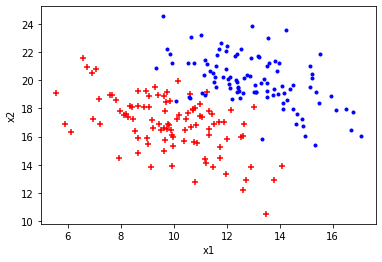

In [ ]:
day0 = np.loadtxt("/content/drive/My Drive/Colab Notebooks/day0.txt", delimiter=',')

X = day0[:,:-1] #features
y = day0[:,-1] #class label

#Let`s plot the data
plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r', label='x1')
plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b', label='x2')
plt.xlabel("x1")
plt.ylabel("x2")

2.Logistic Regression Model Learning - find learning rate

In [ ]:
def train(X, y, l_rate):
    clf = SGDClassifier(loss='log', penalty='l2', learning_rate='constant',
                        eta0=l_rate, tol=None)
    
    loss_list = []
    for i in range(10000):
      clf.partial_fit(X, y, classes = np.unique(y))
      y_pred = clf.predict_proba(X)
      loss_list.append(log_loss(y, y_pred))
    return loss_list

# Model Training with different learning rates
l_rates = [1e-5, 1e-4, 1e-3]

loss_lists = []
for l_rate in l_rates:
    loss_list = train(X, y, l_rate)
    loss_lists.append(loss_list)  

3.Plot the Curve to find the best rate

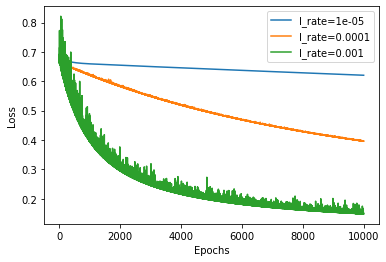

In [ ]:
fig = plt.figure()
for i in range(len(loss_lists)):
    plt.plot(np.arange(0,10000,1), loss_lists[i], label='l_rate={}'.format(l_rates[i]))
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend(loc='best')

4.Find the accuracy with given learning rate

In [ ]:
cls = SGDClassifier(loss = 'log', max_iter=10000, tol = None, penalty='l2', 
                           learning_rate="constant", eta0 = 1e-3)
cls.fit(X,y)
print('Train accuracy = {}%'.format(100*classifier.score(X, y)))

Train accuracy = 95.5%


5.Visualize decision boundary


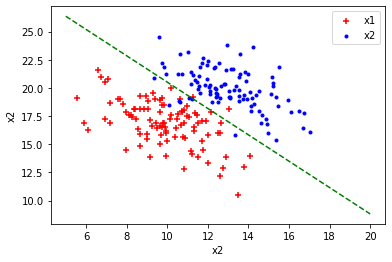

In [ ]:
b0 = cls.intercept_
b1 = cls.coef_[0][0]
b2 = cls.coef_[0][1]

x1 = np.linspace(5,20,100)
x2 = -b0/b2 - b1/b2*x1

plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r', label='x1')
plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b', label='x2')
plt.xlabel("x2")
plt.ylabel("x2")
plt.plot(x1, x2, color="g", linestyle="--", marker=None)
plt.legend()

7.Logistic Regression - Incrementally adjust to new data

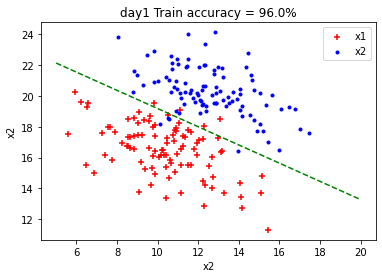

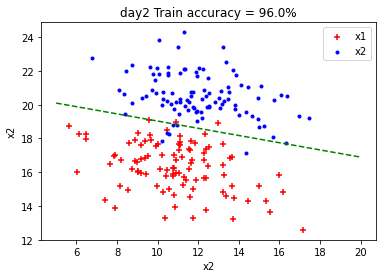

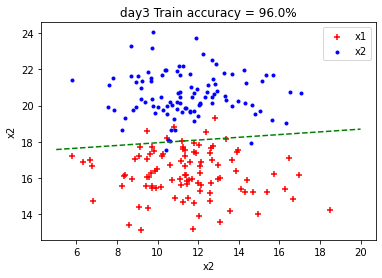

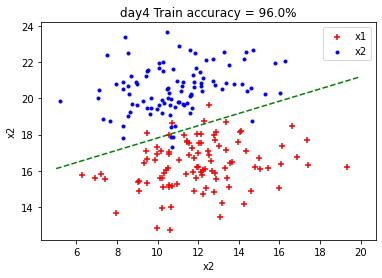

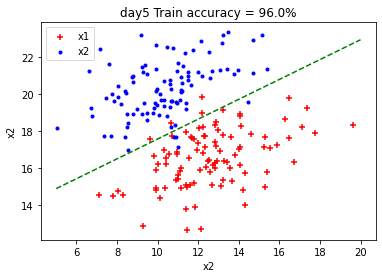

In [ ]:
#apply day0 data to other days
#We assume the learning rate:1e-3 would be the best learning rate for all days

#for days1 to days5
for i in range(1,6): 
  days = np.loadtxt(f"/content/drive/My Drive/Colab Notebooks/day{i}.txt", delimiter=',')
  X = days[:,:-1] #features
  y = days[:,-1] #class label
  
  #adjust the classifier on other days with k epochs
  for j in range(100): #in this case, when k greater than 1000, the accuracy shows same value as we saw in day0 data
    cls.partial_fit(X, y, classes = np.unique(y))
  
  acc = cls.score(X,y)

  #visualize the plot with decision boundary for each day
  b0 = cls.intercept_
  b1 = cls.coef_[0][0]
  b2 = cls.coef_[0][1]
  x1 = np.linspace(5,20,100)
  x2 = -b0/b2 - b1/b2*x1


  plt.figure() #for ploting different days
  plt.title(f'day{i} Train accuracy = {100*acc}%') #title
  plt.scatter(X[y == 1,0], X[y == 1,1], marker='+', c='r', label='x1')
  plt.scatter(X[y == 0,0], X[y == 0,1], marker='.', c='b', label='x2')
  plt.xlabel("x2")
  plt.ylabel("x2")
  plt.plot(x1, x2, color="g", linestyle="--", marker=None)
  plt.legend()